# Analysing Historical Weather Data - 1/100

This is a project I did for analyzing historical weather data using data from the **National Oceanic and Atmosphere Administration (NOAA)**. The climate data online service provides access to an archive of **global historical weather and climate data**. Specifically, we will use data from the GCOS Surface Network, a global reference network of observation stations. This data is available publicly and can be downloaded from [Here](ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily)

## Project Goals
- To load station and temperature data from NOAA files
- Intergrate, smooth and plot data
- Compute Daily Records

In [1]:
# Importing all packages that will be used
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('ghcnd-stations.txt', 'r') as f:
    print(f.readlines()[:10])

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n', 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n', 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n', 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n', 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n', 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n', 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n', 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n', 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n', 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']


## Next Steps -:
- Split the line by whitespaces
- Assign the resulting field to a python list
- We use station code as key for our dictionary
- All items from fifth position used as station name

In [8]:
# Initialize dictonary
stations = {}

with open('ghcnd-stations.txt', 'r') as f:
    for lines in f.readlines():
        fields = lines.split()
        stations[fields[0]] = ''.join(fields[4:])
        
print(len(stations))
count = 0
for key, value in stations.items():
    if(count > 5):
        break
    print(f'Station {key}, Station Details - {value}')
    count += 1
    
        

106681
Station ACW00011604, Station Details - STJOHNSCOOLIDGEFLD
Station ACW00011647, Station Details - STJOHNS
Station AE000041196, Station Details - SHARJAHINTER.AIRPGSN41196
Station AEM00041194, Station Details - DUBAIINTL41194
Station AEM00041217, Station Details - ABUDHABIINTL41217
Station AEM00041218, Station Details - ALAININTL41218


In [17]:
# Check the station files save them to a list and confirm if you have the station numbers
import os
file_list = os.listdir('stations_files')
print(file_list[:5])

# Function to remove .dly
# def remove_dly(full_name):
#     return full_name[:-3]


list_of_station_names = list(map(lambda x: x[:-4], file_list))
print(list_of_station_names[:5])

stations_to_delete = []

# delete keys in dictionary that don't exits in the list of station names
for station_item in stations.keys():
    if station_item not in list_of_station_names:
        stations_to_delete.append(station_item)

print(f"Stations to delete: {len(stations_to_delete)}")

# delete all station that are not found in the list_of_station_names
for station_name in stations_to_delete:
    del stations[station_name]
        
print(len(stations))
print(len(list_of_station_names))

['AE000041196.dly', 'AF000040930.dly', 'AG000060390.dly', 'AG000060590.dly', 'AG000060611.dly']
['AE000041196', 'AF000040930', 'AG000060390', 'AG000060590', 'AG000060611']
Stations to delete: 0
575
584


In [19]:
# View the data structure in a single station
with open('stations_files/AE000041196.dly') as file:
    print(file.readlines()[0])

AE000041196194403TMAX-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     380  I  346  I  319  I  302  I  296  I  308  I  291  I  296  I  296  I  335  I  396  I  313  I



In [21]:
#Function to parse the file
def parsefile(filename):
    return np.genfromtxt(filename, delimiter = dly_delimiter, usecols = dly_usecols, dtype = dly_dtype,
                         names = dly_names)

#Define the arguments
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

#Parse the file and see the output.
first_station = parsefile('stations_files/AE000041196.dly')
print(first_station)

[(1944, 3, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   380,   346,   319,   302,   296,   308,   291,   296,   296,   335,   396,   313)
 (1944, 3, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   191,   174,   174,   202,   230,   174,   169,   141,   130, -9999,   230,   202)
 (1944, 3, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0)
 ...
 (2018, 8, 'TMAX', -9999, -9999,   413, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999)
 (2018, 8, 'TMIN',   292,   294,   306, -9999, -999

In [22]:
#Define function to unroll the parsed file.
def unroll(record):
	startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
	dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))

	rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]

	return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

#Now check the output after unroll.
print(unroll(first_station[0]))

[('1944-03-01', -999.9) ('1944-03-02', -999.9) ('1944-03-03', -999.9)
 ('1944-03-04', -999.9) ('1944-03-05', -999.9) ('1944-03-06', -999.9)
 ('1944-03-07', -999.9) ('1944-03-08', -999.9) ('1944-03-09', -999.9)
 ('1944-03-10', -999.9) ('1944-03-11', -999.9) ('1944-03-12', -999.9)
 ('1944-03-13', -999.9) ('1944-03-14', -999.9) ('1944-03-15', -999.9)
 ('1944-03-16', -999.9) ('1944-03-17', -999.9) ('1944-03-18', -999.9)
 ('1944-03-19', -999.9) ('1944-03-20',   38. ) ('1944-03-21',   34.6)
 ('1944-03-22',   31.9) ('1944-03-23',   30.2) ('1944-03-24',   29.6)
 ('1944-03-25',   30.8) ('1944-03-26',   29.1) ('1944-03-27',   29.6)
 ('1944-03-28',   29.6) ('1944-03-29',   33.5) ('1944-03-30',   39.6)
 ('1944-03-31',   31.3)]


In [24]:
type(unroll(first_station[0]))

numpy.ndarray

In [26]:
# Concatenate all values after unroll
# Define getobs function to concatenate all records after parse and unroll.
def getobs(filename,obs):
	return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

#Check the output and compare it with previous exercises.
print(getobs('stations_files/AE000041196.dly','TMIN'))

[('1944-03-01', -999.9) ('1944-03-02', -999.9) ('1944-03-03', -999.9) ...
 ('2018-08-29', -999.9) ('2018-08-30', -999.9) ('2018-08-31', -999.9)]


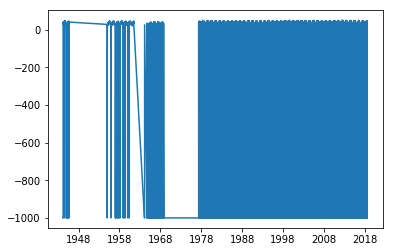

In [29]:
#Take the output for minimum and maximum values.
firststation_tmax = getobs('stations_files/AE000041196.dly','TMAX')
firststation_tmin = getobs('stations_files/AE000041196.dly','TMIN')

#Plot the output
plt.plot(firststation_tmax['date'], firststation_tmax['value'])
plt.show()

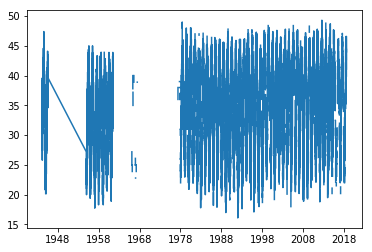

In [31]:
# Define getobs function to concatenate all records after parse and unroll.
def getobs(filename,obs):
	data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

	data['value'][data['value'] == -999.9] = np.nan

	return data

# Take the output for minimum and maximum values.
firststation_tmax = getobs('stations_files/AE000041196.dly','TMAX')
firststation_tmin = getobs('stations_files/AE000041196.dly','TMIN')

#Plot the output
plt.plot(firststation_tmax['date'], firststation_tmax['value'])
plt.show()

In [32]:
# Let's define a function to fill all the nan's through interpolation
#Write a function to fill NaN values by interpolation.
def fillnans(data):
	dates_float = data['date'].astype(np.float64)
	nan = np.isnan(data['value'])
	data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])
    
# Fill nan values for max and min records
fillnans(firststation_tmax)
fillnans(firststation_tmin)

# Calculate Mean
print(np.mean(firststation_tmax['value']), np.mean(firststation_tmin['value']))

34.104391180613 34.104391180613


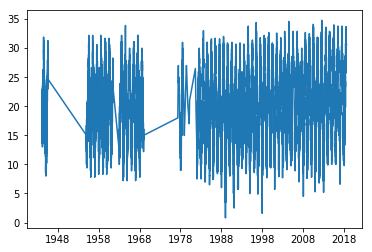

In [33]:
# Show the plot
plt.plot(firststation_tmin['date'], firststation_tmin['value'])
plt.show()

## Smoothing - Averaging short-term fluctuations to see long-term scales

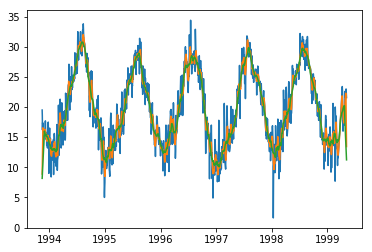

In [37]:
#Write a function to smooth the plot.
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    plt.plot(t['date'], smoothed)

#We will try a couple of different smoothing parameters and also compare with the plot without smoothing.
plt.plot(firststation_tmin[10000:12000]['date'], firststation_tmin[10000:12000]['value'])
plot_smoothed(firststation_tmin[10000:12000])
plot_smoothed(firststation_tmin[10000:12000],30)

#Show the plot
plt.show()

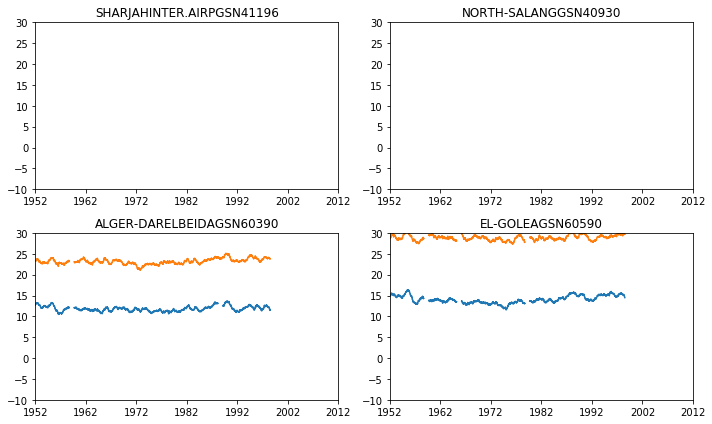

In [41]:
#Defining a list of selected stations.
datastations = list_of_station_names[:4]

plt.figure(figsize=(10,6))

for i,code in enumerate(datastations):
	plt.subplot(2,2,i+1)

	plot_smoothed(getobs('stations_files/{}.dly'.format(code),'TMIN'),365)
	plot_smoothed(getobs('stations_files/{}.dly'.format(code),'TMAX'),365)

	plt.title(stations[code])
	plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

plt.tight_layout()

In [43]:
# Define the function to select year.
def selectyear(data,year):
	start = np.datetime64('{}'.format(year))
	end = start + np.timedelta64(1,'Y')

	return data[(data['date'] >= start)]['value']

# Arrange all the years in a matrix
firststation_tmin_all = np.vstack([selectyear(firststation_tmin,year)[:365] for year in range(1951,2014+1)])
firststation_tmax_all = np.vstack([selectyear(firststation_tmax,year)[:365] for year in range(1951,2014+1)])

# Display result
print(firststation_tmin_all)
print(firststation_tmax_all)

[[15.   14.4  16.7  ... 14.4  13.9  15.  ]
 [15.   14.4  16.7  ... 14.4  13.9  15.  ]
 [15.   14.4  16.7  ... 14.4  13.9  15.  ]
 ...
 [ 9.6  10.   10.8  ... 16.   12.85  9.7 ]
 [ 8.6   7.1  12.5  ... 13.7  13.4  13.1 ]
 [12.8  14.5  14.   ... 16.   15.3  13.9 ]]
[[27.2 25.6 22.8 ... 23.3 25.  28.3]
 [27.2 25.6 22.8 ... 23.3 25.  28.3]
 [27.2 25.6 22.8 ... 23.3 25.  28.3]
 ...
 [26.9 27.5 28.5 ... 23.9 24.1 24.2]
 [25.  26.2 25.8 ... 23.7 24.9 25. ]
 [24.4 24.3 23.3 ... 25.4 25.9 26.4]]


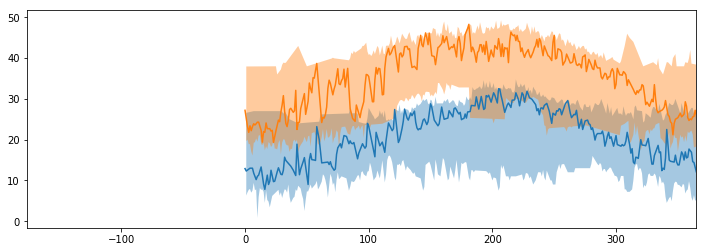

In [45]:
plt.figure(figsize=(12,4))

days = np.arange(1,365+1)

plt.fill_between(days,np.min(firststation_tmin_all,axis=0),np.max(firststation_tmin_all,axis=0),alpha=0.4)
plt.plot(selectyear(firststation_tmin,2009))
plt.fill_between(days,np.min(firststation_tmax_all,axis=0),np.max(firststation_tmax_all,axis=0),alpha=0.4)
plt.plot(selectyear(firststation_tmax,2009))

plt.axis(xmax=365)
plt.show()